In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 46 kB 3.8 MB/s 
     |████████████████████████████████| 1.2 MB 43.6 MB/s 
     |████████████████████████████████| 186 kB 47.0 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 51 kB 304 kB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastai.vision.all import *

In [3]:
images = get_image_files('/content/gdrive/MyDrive/colab/simra-fastai/images')
images

(#5616) [Path('/content/gdrive/MyDrive/colab/simra-fastai/images/Berlin/Rides/2020/05/VM2_238817994*7*false*.png'),Path('/content/gdrive/MyDrive/colab/simra-fastai/images/Berlin/Rides/2020/05/VM2_238817994*10*false*.png'),Path('/content/gdrive/MyDrive/colab/simra-fastai/images/Berlin/Rides/2020/05/VM2_238817994*14*false*.png'),Path('/content/gdrive/MyDrive/colab/simra-fastai/images/Berlin/Rides/2020/05/VM2_238817994*5*false*.png'),Path('/content/gdrive/MyDrive/colab/simra-fastai/images/Berlin/Rides/2020/05/VM2_238817994*8*false*.png'),Path('/content/gdrive/MyDrive/colab/simra-fastai/images/Berlin/Rides/2020/05/VM2_238817994*13*false*.png'),Path('/content/gdrive/MyDrive/colab/simra-fastai/images/Berlin/Rides/2020/05/VM2_238817994*9*false*.png'),Path('/content/gdrive/MyDrive/colab/simra-fastai/images/Berlin/Rides/2020/05/VM2_1215600840*1*true*.png'),Path('/content/gdrive/MyDrive/colab/simra-fastai/images/Berlin/Rides/2020/05/VM2_238817994*17*false*.png'),Path('/content/gdrive/MyDrive/col

In [4]:
def label_func(filepath):
  is_incident = filepath.name.split('*')[-2]
  if (is_incident == 'true'):
      return 'incident'
  else:
      return 'no-incident'

label = label_func(Path('Rides/2020/03/VM2_1338679097*17*false*.png'))
label

'no-incident'

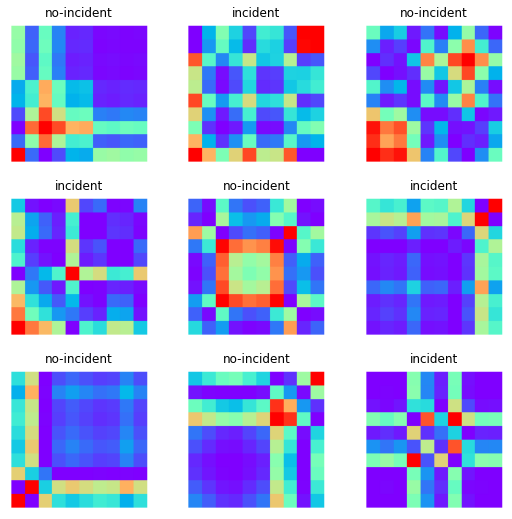

In [5]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(valid_pct=0.2, seed=42))

dls = dblock.dataloaders('/content/gdrive/MyDrive/colab/simra-fastai/images')
dls.show_batch()


In [6]:
doc(dls)

In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [8]:
# lr_result = learn.lr_find()
# lr_result.valley

In [14]:
# learn.fine_tune(2, base_lr=lr_result.valley)
# learn.fine_tune(2, base_lr=0.0012022644514217973)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.004584,2.208105,0.427427,01:19


epoch,train_loss,valid_loss,error_rate,time
0,0.089990,2.982197,0.440784,01:48
1,0.227620,1.202289,0.422084,01:48
2,0.106112,1.376887,0.406055,01:48
3,0.036212,1.366019,0.415850,01:48


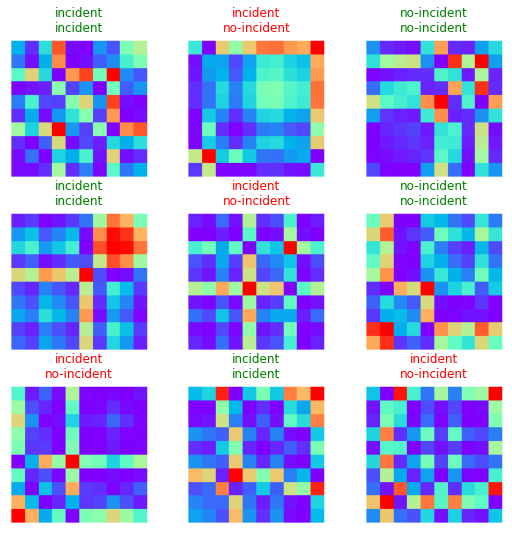

In [10]:
learn.show_results()

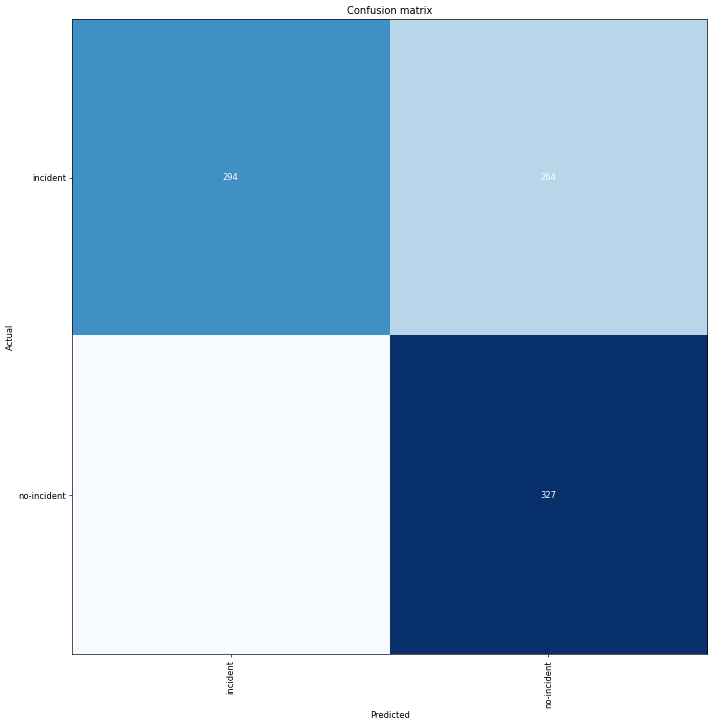

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

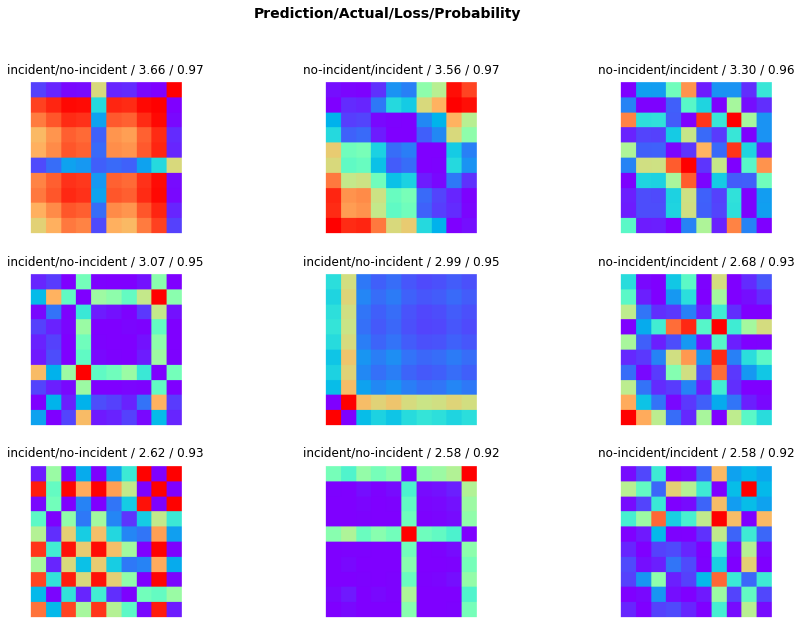

In [12]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))


In [13]:
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.513518,0.931467,0.475512,01:19


epoch,train_loss,valid_loss,error_rate,time
0,0.477925,0.899005,0.454141,01:48
1,0.425591,1.027172,0.462155,01:48
2,0.333806,1.063008,0.426536,01:48
3,0.164173,1.227264,0.414960,01:48
4,0.065429,1.196644,0.427427,01:48
5,0.024017,1.208821,0.430098,01:48
